### Make dataset for linear regression

This notebook helps to create a dataset for linear regression for the C++ machine learning algorithms for testing purposes. We implement also the gradient descend algorithme for make sur everything is fine with the created dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from pandas.plotting import scatter_matrix

In [3]:
X,y = make_regression(n_samples=100, n_features=10)

In [4]:
col = ['feature_'+str(i) for i in range(1,11)]
features = pd.DataFrame(data=X, columns = col)
target = pd.DataFrame(data=y, columns=['target'])
data = pd.concat([features, target],axis=1)

In [5]:
data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-1.686569,-0.303260,-0.734029,1.228732,-1.106713,-0.151906,-0.081646,1.151655,0.260928,-1.004127,-108.508569
1,0.885932,-1.109248,-0.219303,0.393709,-0.820161,0.933685,1.069767,-0.035715,-0.385827,1.277332,141.535832
2,-0.010042,1.232692,1.279524,0.507408,-0.057101,-1.079407,0.813247,-0.744303,0.757038,-0.300129,136.871081
3,-0.247907,-0.341664,-0.636365,-0.345895,-0.365135,-0.291228,-0.898296,0.561797,-2.531428,0.143829,-246.437765
4,0.219213,0.920876,0.447767,-0.811826,-0.007562,0.400664,-0.336525,1.442032,-2.364714,-1.228635,-60.739483
...,...,...,...,...,...,...,...,...,...,...,...
95,0.270939,-0.547270,-2.335025,0.883124,-0.020546,-1.083639,-0.329883,1.992094,0.643676,-0.949384,-182.126581
96,-0.189159,1.555685,0.003109,0.328546,0.371643,-1.097877,1.218000,-0.406334,-0.130986,-0.895658,94.008635
97,-0.022693,0.603562,-0.614247,-0.234322,-0.320938,-1.136442,-0.526555,-0.111742,0.209654,-0.322435,-123.455500
98,0.197683,0.744605,-0.229082,0.017438,0.927948,-0.034865,0.833694,0.696894,0.238224,-0.580317,125.641816


In [ ]:
data.to_csv('data_test.csv')

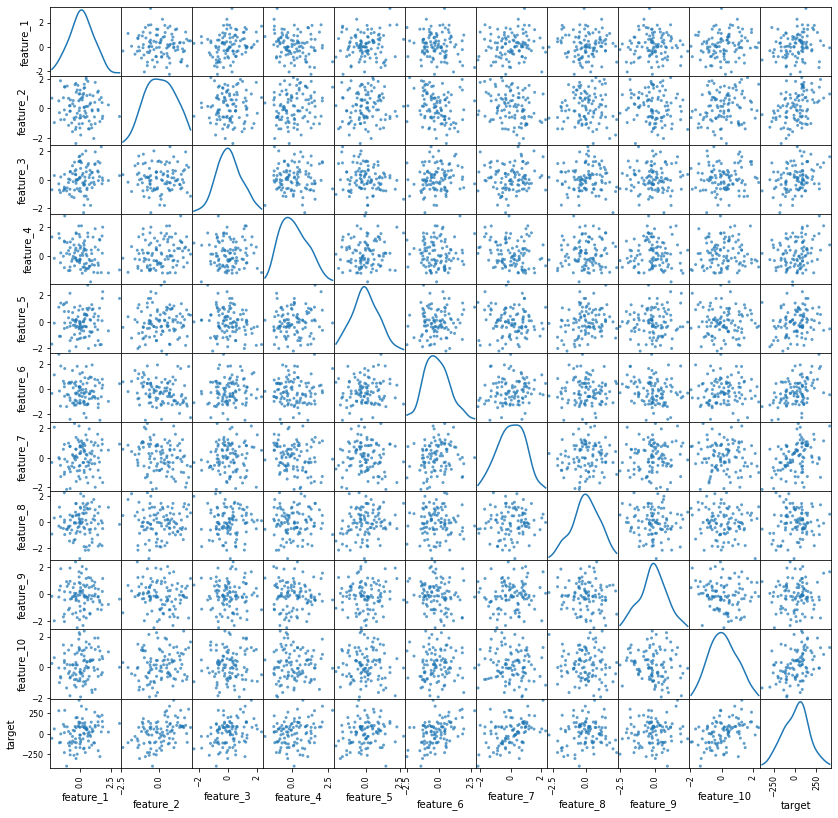

In [11]:
_ = scatter_matrix(data, alpha=0.7,figsize=(14, 14), diagonal='kde')

- On observe quand meme qu'il n'y a pas des linearite entre les features

In [15]:
def gradient_descend(data, label, inter, lr):
    
    m = data.shape[0]
    n = data.shape[1]
    losses = []
    
    theta = np.random.randn(n,1)
    for i in range(inter):
        loss = np.square(data@theta-label).mean()
        print('Error', loss)
        losses.append(loss)
        theta = theta-lr*(1/m)*(data.T@(data@theta-label))
        
    return theta, losses

In [16]:
theta, losses = gradient_descend(X,y.reshape((100,1)),100,10e-2)

Error 22260.51563512707
Error 18623.66795478666
Error 15622.190815871443
Error 13138.153849802988
Error 11076.747379127348
Error 9361.52609097021
Error 7930.671829271213
Error 6734.049727626227
Error 5730.8832919127135
Error 4887.913474596015
Error 4177.937092763034
Error 3578.643280096199
Error 3071.6846645945416
Error 2641.9338742738573
Error 2276.886742096655
Error 1966.181934343795
Error 1701.2132183156834
Error 1474.8156405817797
Error 1281.0108319670858
Error 1114.7997405310325
Error 971.9935116900349
Error 849.0751339104609
Error 743.0859637393103
Error 651.532424036406
Error 572.3091028315838
Error 503.63522057514194
Error 444.0020221372504
Error 392.1291190368104
Error 346.9281822481733
Error 307.4726862579241
Error 272.97264627215645
Error 242.7534847399921
Error 216.2383202107281
Error 192.9330985127294
Error 172.41408928773183
Error 154.31735475445836
Error 138.32986595976536
Error 124.18199768957909
Error 111.64117903900052
Error 100.5065142884147
Error 90.60421973028109
E

In [22]:
def plot_graph(epochs,train_loss):
    
    fig = plt.figure(figsize=(10,4))
    plt.title("Train Loss")
    plt.plot(list(np.arange(epochs) + 1) , train_loss, label='train')
    plt.xlabel('num_epochs', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    plt.legend(loc='best')

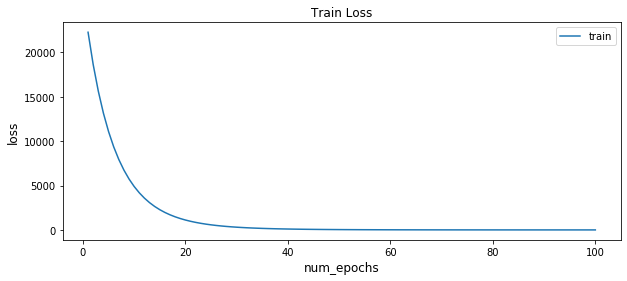

In [23]:
plot_graph(100,losses)